# 1. Матричные вычисления в Python
**Цель работы**: Изучить библиотеки для матричных вычислений языка Python, средства обработки и визуализации табличных данных.

## Библиотека NumPy

В языке Python отстуствуют встроенные средства для эффективной работы с векторами и матрицами. Ближайший аналог — списки, но они вычисления над ними сравнительно медленные, и в языке нет инструментов для вычисления матричных разложений, поиска обратной матрицы и т. д. Однако проблема решается подключением сторонних библиотек, из которых самой распространённой является NumPy. Многие другие библиотеки, такие как SciPy и Matplotlib строятся на её основе.

Часть NumPy для большей эффективности расчётов написана на C с использованием оптимизированной для высокопроизводительных расчётов библиотеки LAPACK. Если же её быстродействия не хватает, можно подключить библиотеку Theano, позволяющую использовать для ускорения работы средства GPU видеокарты.

Библиотека обычно подключается следующим образом:

In [1]:
import numpy as np

### Массивы

Основной тип данных NumPy — массив, соответствующий матрицам и векторам. Он представлен классом array. Важное отличие массивов от списков заключается в том, что *все элементы имеют единый тип данных*.

Массив может иметь несколько измерений, тогда его элементы будут индексироваться не числом, а парой чисел (сравните со списками списков в Python). Количество измерений называется *рангом* (rank). *Форма массива* (shape) — это кортеж размеров по всем измерениям.

Конструктор класса позволяет создавать массивы на основе списков. Доступ к элементам осуществляется как обычно, указанием индекса в квадратных скобках.

In [2]:
a = np.array([2, 3, 5, 7])
print ('a =', a)
print ('Тип a:', type(a))
print ('Форма a:', a.shape)
print ('a[0] = {}, a[2] = {}'.format(a[0], a[2]))
a[0] = 11
print ('a =', a)

a = [2 3 5 7]
Тип a: <class 'numpy.ndarray'>
Форма a: (4,)
a[0] = 2, a[2] = 5
a = [11  3  5  7]


Пример двумерного массива, то есть 2-го ранга. Массив инициализируется списком строк, каждая из которых представляет собой список элементов.

In [3]:
b = np.array([[1, 2, 3], [4, 5, 6]])
print (b)
print ('Форма b:', b.shape)
print ('b[0,0] = {}, b[0,1] = {}'.format(b[0,0], b[0,1]))

[[1 2 3]
 [4 5 6]]
Форма b: (2, 3)
b[0,0] = 1, b[0,1] = 2


Обратите внимание на то, что оба индекса указываются в одной паре скобок через запятую.

Для некоторых массивов специального вида есть отдельные функции:

- zeros — массив нулей,
- ones — массив единиц,
- eye (или identity) — единичная матрица,
- full — массив, заполненный указанной константой,
- random — массив, заполненный случайными числами.

Полный перечень команд для создания массивов можно посмотреть в документации.

Почти все команды принимают в качестве обязательного аргумента форму массива в виде кортежа. Обратите внимание на двойную пару скобок! Первая пара ограничивает аргументы функции, а вторая — это кортеж.

In [4]:
a = np.zeros((2, 2))
print (a)

[[0. 0.]
 [0. 0.]]


In [5]:
b = np.ones((1, 2))
print (b)

[[1. 1.]]


In [6]:
c = np.full((2, 1), 5.0)
print (c)

[[5.]
 [5.]]


In [7]:
d = np.eye(3) # Единичная матрица размера 3×3
print (d)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [8]:
e = np.random.random((3, 3))
print (e)

[[0.58787091 0.11692286 0.07453546]
 [0.45527109 0.55570232 0.04317296]
 [0.53013004 0.48003181 0.05271006]]


Если нужен вектор, заполненный числами с некоторым шагом, то полезными могут оказаться функции `arange` и `linspace`. Первая работает аналогично стандартной функции `range` языка Python, а вторая равномерно разбивает отрезок указанным количеством точек.

In [9]:
print (np.arange(0, 1, 0.1))
print (np.linspace(0, 1, 11))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


### Индексирование

Есть несколько способов получения элементов массива.

#### Сечения

Команды доступа к элементам не ограничиваются получением значения по индексу. Массивы позволяют получить сразу группу элементов с помощью диапалонов индексов (*сечений*), как это реализовано в списках.

Сечение имеет вид: `[начало:конец:шаг]`. *Конец диапазона не включается.* Шаг — необязательный параметр. Если начало или конец совпадают с началом или концом диапазона индексов, то их тоже можно опустить.

In [10]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print (a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [11]:
print (a[:2, 1:3]) # Строки до второй, столбцы от 1 до 2 (т.к. 3 не включается)

[[2 3]
 [6 7]]


In [12]:
print (a[:,::2]) # Все строки, чётные столбцы

[[ 1  3]
 [ 5  7]
 [ 9 11]]


In [13]:
print (a[0, :]) # Строка № 0

[1 2 3 4]


При сечении массива ранг может меняться.

In [14]:
print (a[:, 0]) # Столбец № 0 (в виде массива ранга 1)

[1 5 9]


In [15]:
print (a[:, 0:1]) # Столбец № 0 (в виде массива ранга 2)

[[1]
 [5]
 [9]]


#### Индексирование массива массивом

Если вместо индекса указать массив индексов, то это позволит получить сразу группу интересующих элементов.

In [16]:
a = np.array([10, 11, 12, 13, 14, 15, 16])
print (a[[2, 4, 5]]) # Элементы с номерами 2, 4, 5

[12 14 15]


#### Индексирование логическими значениями

Также массив можно индексировать массивом такой же длины, содержащим только логические значения. Это позволяет задать маску или фильтр: будут отобраны только те элементы, которым соответствует истина.

In [17]:
a = np.array([-5, 10, -12, 3])
print (a[np.array([True, False, True, False])]) # Отбираем отрицательные числа вручную

[ -5 -12]


Маску обычно не задают вручную, а получают её как результат выполнения логических операций.

In [18]:
print (a < 0)

[ True False  True False]


In [19]:
print (a[a<0])

[ -5 -12]


### Типы данных

Каждый массив содержит элементы одного и того же типа. Numpy поддерживает большое количество типов, из которых можно конструировать массивы. Если тип не указан, библиотека пытается «угадать» его. Например, если в конструкторе использовались только целые числа, то и тип будет целочисленным. Но тип можно указать и явно в параметре `dtype`.

In [20]:
x = np.array([1, 2])
print (x.dtype)

int32


In [21]:
x = np.array([1.0, 2.0])
print (x.dtype)

float64


In [22]:
x = np.array([1, 2], dtype=np.float32)
print (x.dtype)

float32


### Матричная арифметика

Массивы поддерживают обычные арифметические операции: сложение, вычитание, умножение и деление. При этом *операции выполняются поэлементно*.

In [23]:
A = np.array([[1, 2], [3, -1]])
B = np.array([[-3, 2], [-5, 7]])
print (A)
print () # Пустая строка
print (B)

[[ 1  2]
 [ 3 -1]]

[[-3  2]
 [-5  7]]


In [24]:
print (A + B)

[[-2  4]
 [-2  6]]


In [25]:
print (A - B)

[[ 4  0]
 [ 8 -8]]


In [26]:
print (A * B)

[[ -3   4]
 [-15  -7]]


In [27]:
print (A / B)

[[-0.33333333  1.        ]
 [-0.6        -0.14285714]]


Также есть возможность поэлементно применять математические функции.

In [28]:
C = np.array([[1, 2], [3, 4]])
print (np.sqrt(C))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Для матричного умножения используется либо функция `dot`, либо одноимённый метод.

In [29]:
print (np.dot(A, B))

[[-13  16]
 [ -4  -1]]


In [30]:
print (A.dot(B))

[[-13  16]
 [ -4  -1]]


Транспонированную матрицу можно получить при помощи свойства `T`.

In [31]:
print (A.T)

[[ 1  3]
 [ 2 -1]]


Однако заметьте, что транспонирование матрицы ранга 1 не меняет её.

In [32]:
X = np.array([1, 2, 3])
print(X)
print(X.T)

[1 2 3]
[1 2 3]


### Изменение размеров матриц

Часто бывает полезно тем или иным образом изменить размеры матрицы. Например, если требуется к каждой строке матрицы $A$ прибавить вектор-строку $v$. В этом случае можно многократно продублировать вектор-строку, превратив её в матрицу, пригодную для сложения с $A$. Это можно сделать с помощью функции `tile`.

In [33]:
v = np.array([1, 2, 3])
vv = np.tile(v, (4, 1)) # 4 повтора по вертикали и один по горизонтали
print (vv)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


Оказывается полезным и построчное переписывание элементов массива в массив другой формы с помощью функции `reshape`.

In [34]:
D1 = np.array([[1, 2, 3], [4, 5, 6]])
print (D1)

[[1 2 3]
 [4 5 6]]


In [35]:
D2 = np.reshape(D1, (3, 2))
print (D2)

[[1 2]
 [3 4]
 [5 6]]


### Линейная алгебра

В подбиблиотеке numpy.linalg находятся полезные функции, для работы с матрицами. Например:

- `linalg.cholesky` — разложение Холецкого,
- `linalg.qr` — QR-разложение,
- `linalg.svd` — сингулярное матричное разложение,
- `linalg.eig` — поиск собственных значений и векторов,
- `linalg.det` — определитель матрицы,
- `linalg.norm` — норма матрицы,
- `linalg.inv` — обратная матрица,
- `linalg.pinv` — псевдообратная матрица,
- `linalg.solve` — решение системы линейных уравнений, заданной в матричном виде.

Например, найдём определитель
$$\left|
\begin{array}{cc}
1 & 2 \\
-2 & 3
\end{array}
\right|.$$

In [36]:
A = np.array([[1, 2], [-2, 3]])
print(A)

[[ 1  2]
 [-2  3]]


In [37]:
print (np.linalg.det(A))

7.000000000000001


Решим систему уравнений
$$
\left\{
\begin{array}{ll}
3x + y &= 2, \\
 x - y &= 3.
\end{array}
\right.
$$

In [38]:
A = np.array([[3, 1], [1, -1]])
b = np.array([2, 3])
x = np.linalg.solve(A, b)
print(x)

[ 1.25 -1.75]


Решение системы уравнений с помощью `solve` вычислительно более выгодно, чем применение обратных матриц, хотя их тоже можно использовать для решения.

## Библиотка SciPy

Выше рассмотрена лишь малая часть множества функций NumPy. И без того богатые возможности этой библиотеки значительно расширяет билиотека SciPy, содержащая следующие основные подбиблиотеки:

- `scipy.special` — специальные функции,
- `scipy.integrate` — интегрирование,
- `scipy.optimize` — оптимизация,
- `scipy.interpolate` — интерполяция,
- `scipy.fftpack` — преобразование Фурье,
- `scipy.signal` — обработка сигналов,
- `scipy.linalg` — линейная алгебра,
- `scipy.stats` — статистика,
- `scipy.io` — файловый ввод/вывод и другие.

### Загрузка и сохранение матриц

При работе с большими матрицами неудобно объявлять их в программном коде. Также полезно иметь возможность сохранять на диск результаты вычислений, чтобы можно было вернуться к ним в дальнейшем.

Одним из популярных форматов хранения матриц на диске являются mat-файлы, используемые в системе Matlab. Файлы этого формата могут хранить несколько матриц как архив. Для работы с ними в библиотеке `scipy.io` предусмотрены функции `loadmat` и `savemat`.

In [39]:
A = np.array([[1, 2], [3, 4]])
print (A)

[[1 2]
 [3 4]]


In [40]:
import scipy.io as sio
sio.savemat ('data.mat', {'A': A}) # Указано имя файла, имя матрицы в архиве и сама матрица

In [41]:
B = sio.loadmat('data.mat')['A'] # Загружаем матрицу под именем A и помещаем в переменную B
print (B)

[[1 2]
 [3 4]]


### Оптимизация и поиск корней

Очень полезна на практике подбиблиотека для оптимизации `scipy.optimize`. В ней реализованы функции для поиска безусловных и условных экстремумов различными методами.

In [42]:
import scipy.optimize as so

Например, найдём минимум функции $$f(x) = (x - 5)^2 + 3$$ широко распространённым методом Бройдена — Флетчера — Гольдфарба — Шанно (BFGS).

In [43]:
def f(x):
    return (x - 5) ** 2 + 3

In [44]:
x_min = so.minimize(f, 0.0, method='BFGS') # 0.0 — начальная точка
print (x_min)

      fun: 3.000000000000001
 hess_inv: array([[0.5]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([5.00000003])


Точка минимума получилась равной 4.99999999, что близко к правильному значению.

Рассмотренный метод — квазиньютоновский и использует для поиска минимума производные, которые по умолчанию находит численно. Можно значительно ускорить вычисления и повысить их точность, записав производную явно.

$$f'(x) = 2 (x - 5)$$

In [45]:
def df(x):
    return 2 * (x - 5)

x_min = so.minimize(f, 0.0, method='BFGS', jac=df) # jac — якобиан, в 1-мерном случае — производная
print (x_min)

      fun: 3.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([5.])


Если требуется найти минимум функции нескольких переменных, то она записывается как функция, принимающая список.

Например, найдём минимум функции
$$
g(x_0, x_1) = (x_0 - 4)^2 + (x_1 - 3)^2.
$$

In [46]:
def g(xs):
    return (xs[0] - 4)**2 + (xs[1] - 3)**2

# Якобиан (если его не использовать, снизится точность и скорость)
def dg(xs):
    dgdx0 = 2 * (xs[0] - 4)       # Производная по x0
    dgdx1 = 2 * (xs[1] - 3)       # Производная по x1
    return np.array([dgdx0, dgdx1])
    

x_min = so.minimize(g, [0.0, 0.0], method='BFGS', jac=dg)
print (x_min)

      fun: 1.9721522630525295e-31
 hess_inv: array([[ 0.68, -0.24],
       [-0.24,  0.82]])
      jac: array([ 0.0000000e+00, -8.8817842e-16])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4., 3.])


Функция `minimize` достаточно универсальна и позволяет находить минимумы функций нескольких переменных с помощью множества других методов, среди которых: `BFGS`, `L-BFGS-B`, `Nelder-Mead`, `Powell`, `CG` (метод сопряжённых градиентов), `COBYLA`, `SLSQP` и другие. Также `minimize` можен решать задачу оптимизации с ограничениями. Имеет смысл ознакомиться с областями применения этих методов для эффективного использования в дальнейшем.

В библиотеке есть несколько функций для глобальной оптимизации. Например, в функции `differential_evolution` реализован метод дифференциальной эволюции.

Для поиска корней реализовано несколько методов, среди которых  методы: Ньютона — Рафсона, Брента, Бройдена и другие.

Все методы для поиска нулей многомерных функций объединены в единой функции `root`. Можно и использовать отдельные функции для методов.

Например, найдём корень уравнения $$x^5 + 2x - 10 = 0$$ на отрезке $[-10, 10].$

In [47]:
def f(x):
    return x**5 + 2*x - 10

In [48]:
x0 = so.brentq(f, -10, 10)
print (x0)

1.4776528958910775


Проверим подстановкой.

In [49]:
print (f(x0))

6.572520305780927e-14


Получили величину $6{,}57\times10^{-14}$, близкую к нулю.

Библиотека позволяет находить и условные минимумы. Например, функция `linprog` позволяет решать задачу линейного программирования симплексным методом.

## Библиотека Matplotlib

Для построения графиков может использоваться библиотека Matplotlib. У неё очень богатые воможности, не все из которых обычно нужны, поэтому часто пользуются упрощёнными функциями, объявленные в подбиблиотеке `pyplot`. Её можно подключить следующим образом.

In [50]:
import matplotlib.pyplot as plt

Для того, чтобы графики отображались прямо в документе IPython Notebook нужно выполнить специальную команду.

In [51]:
%matplotlib inline

Важнейшая функция для построения графиков — функция `plot`, которая похожа на аналогичную команду Matlab. Она строит графики по точкам, абсциссы и ординаты которых заданы двумя векторами.

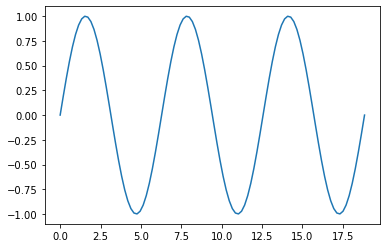

In [52]:
x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)
plt.plot(x, y) # Построение графика
plt.show()     # Отобразить график

У функции можно указать дополнительный параметр, позволяющий указать цвет и тип линии/символов в виде буквенного кода.

Например, для отображения графика красными крестиками можно использовать параметр `'xr'` (x — крестик, r — red, красный).

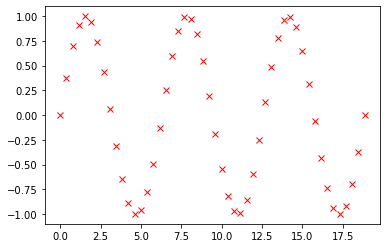

In [53]:
x = np.linspace(0, 6*np.pi, 50)
y = np.sin(x)
plt.plot(x, y, 'xr')
plt.show()

Две команды `plot` позволяют получить наложенные графики. Также график, который ещё не отображён с помощью `show` можно модифицировать, добавив подписи осей (`xlabel`, `ylabel`), заголовок (`title`), легенду (`legend`).

К сожалению, в шрифте по умолчанию нет букв кириллицы, поэтому нужно с помощью команды `rc` задать другой шрифт.

In [54]:
from matplotlib import rc
rc('font', family='Verdana')

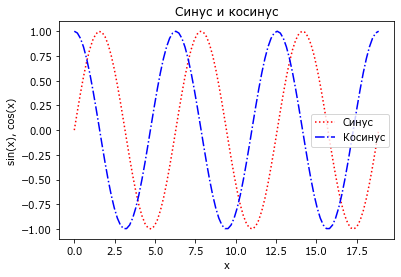

In [55]:
x = np.linspace(0, 6*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, ':r')
plt.plot(x, y2, '-.b')

plt.xlabel('x')
plt.ylabel('sin(x), cos(x)')

plt.legend(['Синус', 'Косинус']) # Названия в порядке отображения графиков

plt.title('Синус и косинус')

plt.show()

Если нужно разбить график на части, то перед командами `plot` каждой части выполняется команда `subplot`. Её аргументы — количество строк, количество столбцов и номер части в разбиении. Например, если нужно разбить график вертикально, то получаем «таблицу» из двух строк и одного столбца, в ячейках которой располагаются графики. Поэтому параметрами команды будут `(2, 1, 1)` и `(2, 1, 2)`.

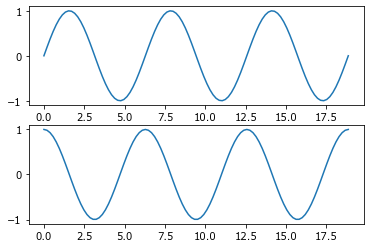

In [56]:
x = np.linspace(0, 6*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.subplot(2,1,1)
plt.plot(x, y1)

plt.subplot(2,1,2)
plt.plot(x, y2)

plt.show()

## Библиотека Pandas

С «сырыми» данными в виде матриц работать не всегда удобно. Например, если данные о квартирах записаны в виде матрицы, где разные столбцы соответствуют разным параметрам (цена, площадь и т. д.), то нужно помнить, какой столбец чему соответствует.

Библиотека Pandas позволяет работать со структурированными данными. Например, с её помощью можно пометить столбцы в матрице.

Для начала подключим библиотеку.

In [57]:
import pandas as pd

Контейнером, содержищим размеченные данные являются объекты типа `DataFrame`. Элементами такого контейнера (фрейма) могут быть последовательности (`Series`), категории (произвольные классы, `Categorical`), массивы Numpy т. д.

Например, рассмотрим фрейм, содержащий информацию о покупках квартир.

In [58]:
apartments = pd.DataFrame(
    {
        'Дата': pd.Series([pd.Timestamp('2012-03-11'), pd.Timestamp('2014-12-26'), pd.Timestamp('2013-05-18')]),
        'Число комнат': [2, 3, 2],
        'Стоимость': np.array([17000, 24000, 18000]),
        'Район': pd.Categorical(['Центр', 'Западный', 'Центр'])
    }
)

Фреймы удобно просматривать с помощью команды `print`. Если данных много, то можно использовать методы `head` (первые строки) и `tail` (последние строки).

In [59]:
print(apartments)

        Дата  Число комнат  Стоимость     Район
0 2012-03-11             2      17000     Центр
1 2014-12-26             3      24000  Западный
2 2013-05-18             2      18000     Центр


In [60]:
print(apartments.head())

        Дата  Число комнат  Стоимость     Район
0 2012-03-11             2      17000     Центр
1 2014-12-26             3      24000  Западный
2 2013-05-18             2      18000     Центр


В среде разработки IPython можно не писать `print`, если ячейка с кодом содержит только имя объекта. Библиотека распознаёт такую ситуацию, и в этом случае фрейм выводится оформленным в виде таблицы.

In [61]:
apartments

,Дата,Число комнат,Стоимость,Район
0,2012-03-11,2,17000,Центр
1,2014-12-26,3,24000,Западный
2,2013-05-18,2,18000,Центр


Если нужны определённые столбцы, то можно индексировать фрейм их именами. Свойство `values` позволяет получить результат не в виде массива Numpy, а не в виде нового фрейма.

In [62]:
print(apartments[['Стоимость', 'Число комнат']].values)

[[17000     2]
 [24000     3]
 [18000     2]]


Библиотека содержит богатые средства анализа данных. Можно посмотреть как основные статистические характеристики (метод `describe`), так и делать выборки по столбцам, строкам, анализировать их параметры, делать запросы к нескольким таблицам сразу.

In [63]:
apartments.describe()

,Число комнат,Стоимость
count,3.000000,3.000000
mean,2.333333,19666.666667
std,0.577350,3785.938897
min,2.000000,17000.000000
25%,2.000000,17500.000000
50%,2.000000,18000.000000
75%,2.500000,21000.000000
max,3.000000,24000.000000


С помощью библиотеки легко строить зависимости одной величины от другой.

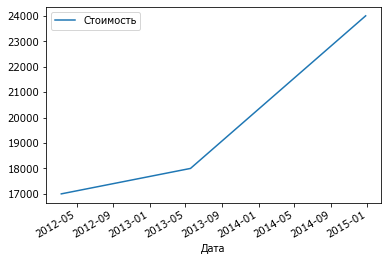

In [64]:
apartments.plot('Дата', 'Стоимость')
plt.show()

Большие объёмы данных, разумеется, не вводятся вручную, как в рассмотренном выше примере. Библиотека поддерживает загрузку и сохранение данных во многих распространённых форматах:
- CSV (текствые документы, с данными разделёнными «,» или «;»),
- HDF5 (один из самых распространённых форматов хранения больших объёмов цифровых данных),
- Excel (файлы в формате xlsx) и другие.

Также есть возможность получать данные в виде SQL-запросов к СУБД. Для сохранения в некоторые форматы могут потребоваться дополнительные библиотеки.

Для примера сохраним рассмотренный фрейм в различных форматах.

In [65]:
apartments.to_csv('apartments.csv')
apartments.to_excel('apartments.xlsx', sheet_name='Квартиры') # Параметр sheet_name задаёт имя листа
apartments.to_html('apartments.html')

Для загрузки данных, например, из документа Excel нужно использовать метод `read_excel`.

In [66]:
apts = pd.read_excel('apartments.xlsx', 'Квартиры')

In [67]:
apts

,Unnamed: 0,Дата,Число комнат,Стоимость,Район
0,0,2012-03-11,2,17000,Центр
1,1,2014-12-26,3,24000,Западный
2,2,2013-05-18,2,18000,Центр


## Источники
Подробную информацию о рассмотренных библиотеках можно найти в следующих источниках.

1. [Getting started with Python for science (англ.)](https://scipy-lectures.github.io/intro/index.html)
* [NumPy — Документация (англ.)](http://docs.scipy.org/doc/numpy/reference/)
* [SciPy — Документация (англ.)](http://docs.scipy.org/doc/scipy/reference/)
* [Matplotlib — Документация (англ.)](http://matplotlib.org/contents.html)
* [NumPy, пособие для новичков](http://habrahabr.ru/post/121031/)
* [Серия статей о NumPy](http://pythonworld.ru/numpy)
* [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

## Задание для самостоятельного выполнения

1. Объявить следующие матрицы и векторы:
$$A = \left(
\begin{array}{rrr}
1 & 2 & 3\\
-2 & 3 & 0\\
5 & 1 & 4
\end{array}
\right),
B = \left(
\begin{array}{rrr}
1 & 2 & 3\\
2 & 4 & 6\\
3 & 7 & 2
\end{array}
\right),
u = \left(
\begin{array}{r}
-4\\
1\\
1\end{array}
\right),
v = \left(
\begin{array}{r}
3\\
2\\
10\end{array}
\right).
$$
* Объявить случайную матрицу $C$ (100x100) и случайный вектор $w$ (100×1).
* Вычислить выражения (здесь умножение матричное)
$$A + B, AB, A^3, ABA, v^TA^T(u+2v), u\cdot v, Cw, w^TC.$$
* Построить матрицу размера $20×20$, элементы которой равны произведениям индексов. Как это сделать без использования циклов?
* Сохранить матрицы и векторы в один общий файл. Для проверки загрузить матрицы из файла.
* Найти сумму положительных элементов матриц $A$ и $B$.
* Записать элементы матрицы $A$ в одну строку и выбрать из них только стоящие на чётных позициях.
* Найти обратные и псевдообратные матрицы для $A$, $B$ и $С$. Проверить правильность вычислений умножением.
* Решить систему уравнений
$$
\left\{
\begin{array}{rrrr}
32x_1  &+7x_2  &-6x_3 &= 12, \\
-5x_1  &-20x_2 &+3x_3 &= 3, \\
       & x_2   &-3x_3 &= 7.
\end{array}
\right.
$$
Проверить решение подстановкой.
* Найти собственные значения и собственные векторы матриц $A$ и $B$. (Если для некоторой матрицы $M$ выполняется условие $Mx=\lambda x,$ то вектор $x$ и число $\lambda$ называются собственными вектором и числом матрицы.)
* Найти минимумы функций
$$f_1(x) = 5(x-2)^4 - \frac1{x^2+8},$$
$$f_2(x_1, x_2) = 4(x_1-3x_2)^2+7x_1^4.$$
* Построить графики функций в одной системе координат
$$g_1(x)=x^5-2x^4+3x-7,$$
$$g_2(x)=x^5+2x^4-3x-7.$$
Подписать оси, указать заголовок и отобразить легенду.
* Построить графики этих же функций в двух системах координат: одна слева, другая справа.
* Найти по одному из нулей каждой из функций $g_1$ и $g_2$.